In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [257]:
data = pd.read_csv('results/wall-time.csv', index_col='n')

display(data.index)
data = data.groupby(data.index).agg(np.median)
data.index.names = ['Tamaño de matriz']

data

Int64Index([ 1000, 10000,  1500,  2000,  2500,  3000,  3500,  4000,  4500,
              500,
            ...
             1000, 10000,  1500,  2000,  2500,  3000,  3500,  4000,  4500,
              500],
           dtype='int64', name='n', length=190)

,row-seq,col-seq,row-par-3,row-par-6,row-par-12,row-par-24,row-par-48,row-par-96,col-par-3,col-par-6,col-par-12,col-par-24,col-par-48,col-par-96
Tamaño de matriz,,,,,,,,,,,,,,
500,0.0050,0.0050,0.0065,0.0055,0.0050,0.0050,0.0055,0.0055,0.0065,0.0050,0.0050,0.0050,0.0050,0.0060
1000,0.0190,0.0200,0.0180,0.0140,0.0095,0.0100,0.0090,0.0110,0.0185,0.0120,0.0095,0.0090,0.0090,0.0110
1500,0.0420,0.0420,0.0285,0.0200,0.0190,0.0155,0.0175,0.0160,0.0300,0.0285,0.0180,0.0155,0.0205,0.0150
2000,0.0750,0.0780,0.0420,0.0300,0.0295,0.0260,0.0325,0.0225,0.0425,0.0335,0.0270,0.0220,0.0230,0.0240
2500,0.1170,0.1230,0.0585,0.0420,0.0445,0.0305,0.0290,0.0310,0.0580,0.0385,0.0350,0.0305,0.0340,0.0290
3000,0.1690,0.1800,0.0765,0.0490,0.0430,0.0605,0.0420,0.0370,0.0800,0.0495,0.0575,0.0405,0.0580,0.0395
3500,0.2300,0.2500,0.0995,0.0600,0.0520,0.0475,0.0440,0.0430,0.1060,0.0625,0.0540,0.0525,0.0575,0.0440
4000,0.3000,0.3440,0.1270,0.0755,0.0620,0.0525,0.0545,0.0610,0.1340,0.0990,0.0640,0.0615,0.0530,0.0500
4500,0.3795,0.4465,0.1550,0.1220,0.0820,0.0630,0.0660,0.0685,0.1650,0.0940,0.0770,0.0655,0.0765,0.0715


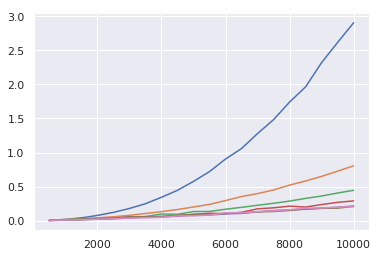

In [258]:
plt.plot(data.index, data.filter(regex='col-.*'))


Text(0,0.5,'Tiempo de ejecución (segundos)')

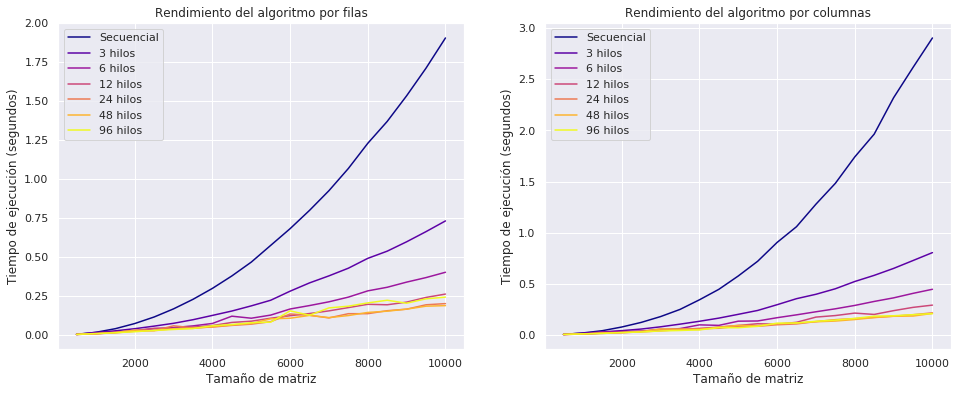

In [259]:
new_col_names = ['Secuencial'] + ['{} hilos'.format(n) for n in [3, 6, 12, 24, 48, 96]]

column_data = data.filter(regex='col-.*')
column_data.columns = new_col_names
accel_column =  (1 / column_data.iloc[:, 1:]).mul(data['col-seq'], axis=0)

row_data = data.filter(regex='row-.*')
row_data.columns = new_col_names
accel_row = (1 / row_data.iloc[:, 1:]).mul(data['row-seq'], axis=0)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)




row_plot = row_data.plot(title='Rendimiento del algoritmo por filas', ax=ax1, colormap='plasma')
row_plot.set_ylabel('Tiempo de ejecución (segundos)')

col_plot = column_data.plot(title='Rendimiento del algoritmo por columnas', ax=ax2, colormap='plasma')
col_plot.set_ylabel('Tiempo de ejecución (segundos)')

#plt.legend(loc='upper left')


Secuencial    1.9020
3 hilos       0.7315
6 hilos       0.4030
12 hilos      0.2635
24 hilos      0.2025
48 hilos      0.1895
96 hilos      0.2440
Name: 10000, dtype: float64

10000

Text(0,0.5,'Tiempo de ejecución (segundos)')

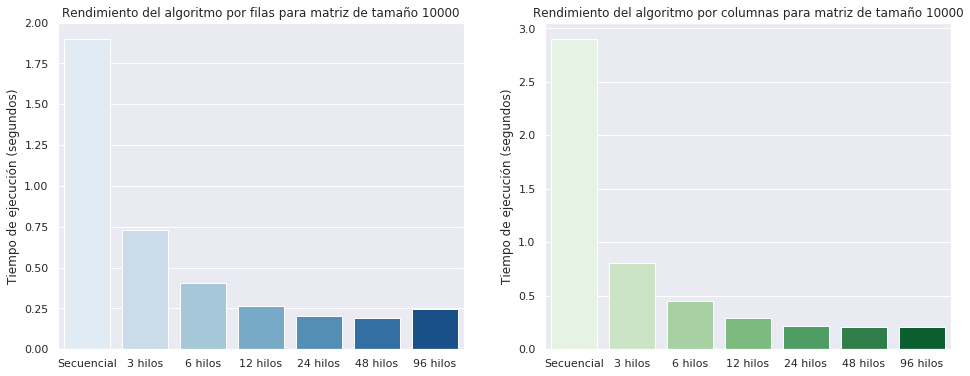

In [260]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)

display(row_data.iloc[-1])

size = row_data.iloc[-1].name
display(size)

row_plt = sns.barplot(x=row_data.iloc[-1].index, y=row_data.iloc[-1],
                      palette="Blues", ax=ax1)
row_plt.set_title('Rendimiento del algoritmo por filas para matriz de tamaño {}'.format(size))
col_plt = sns.barplot(x=column_data.iloc[-1].index, y=column_data.iloc[-1],
                      palette="Greens", ax=ax2)
col_plt.set_title('Rendimiento del algoritmo por columnas para matriz de tamaño {}'.format(size))

# row_plt = row_data.iloc[-1].plot(title='Rendimiento del algoritmo por filas para matriz de tamaño 5000',
#                                 ax=ax1, kind='bar', colormap='plasma')
row_plt.set_ylabel('Tiempo de ejecución (segundos)')
col_plt.set_ylabel('Tiempo de ejecución (segundos)')



Text(0.5,1,'Aceleración del algoritmo por columnas')

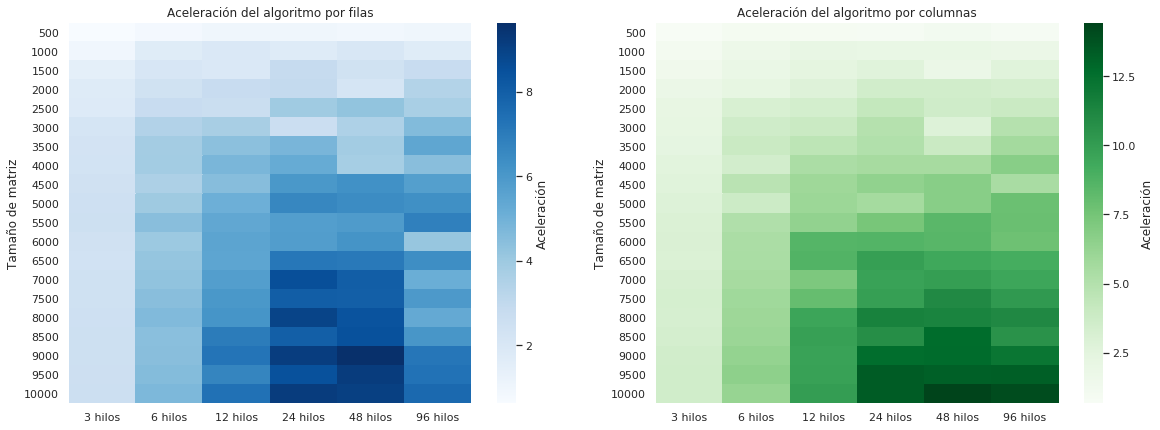

In [249]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)
fig.tight_layout(pad=1.08, h_pad=None, w_pad=4, rect=None)

sns.heatmap(accel_row, cbar_kws={'label': 'Aceleración'},
            cmap='Blues', ax=ax1).set_title("Aceleración del algoritmo por filas")

sns.heatmap(accel_column, cbar_kws={'label': 'Aceleración'}, cmap='Greens',
            ax=ax2).set_title("Aceleración del algoritmo por columnas")


Secuencial    1.9020
3 hilos       0.7315
6 hilos       0.4030
12 hilos      0.2635
24 hilos      0.2025
48 hilos      0.1895
96 hilos      0.2440
Name: 10000, dtype: float64

10000

Text(0,0.5,'Tiempo de ejecución (segundos)')

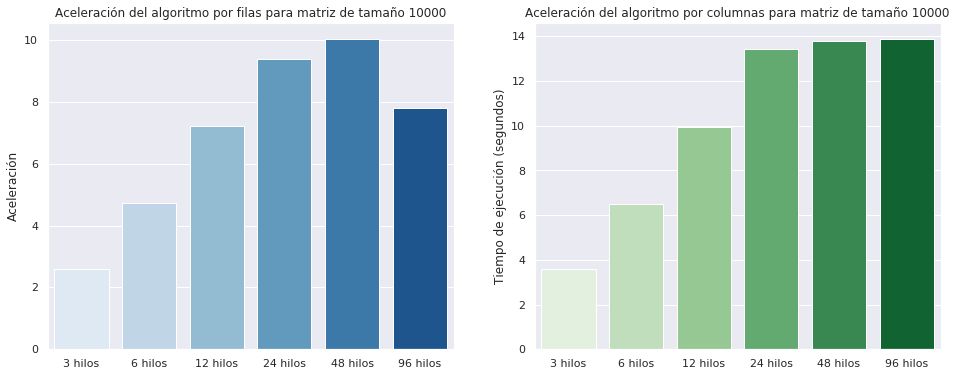

In [262]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)

display(row_data.iloc[-1])

size = row_data.iloc[-1].name
display(size)

row_plt = sns.barplot(x=accel_row.iloc[-1].index, y=accel_row.iloc[-1],
                      palette="Blues", ax=ax1)
row_plt.set_title('Aceleración del algoritmo por filas para matriz de tamaño {}'.format(size))
col_plt = sns.barplot(x=accel_column.iloc[-1].index, y=accel_column.iloc[-1],
                      palette="Greens", ax=ax2)
col_plt.set_title('Aceleración del algoritmo por columnas para matriz de tamaño {}'.format(size))

# row_plt = row_data.iloc[-1].plot(title='Rendimiento del algoritmo por filas para matriz de tamaño 5000',
#                                 ax=ax1, kind='bar', colormap='plasma')
row_plt.set_ylabel('Aceleración')
col_plt.set_ylabel('Aceleración')

Secuencial     1
3 hilos        3
6 hilos        6
12 hilos      12
24 hilos      24
48 hilos      48
96 hilos      96
dtype: int64

Text(0.5,1,'Eficiencia del algoritmo por columnas')

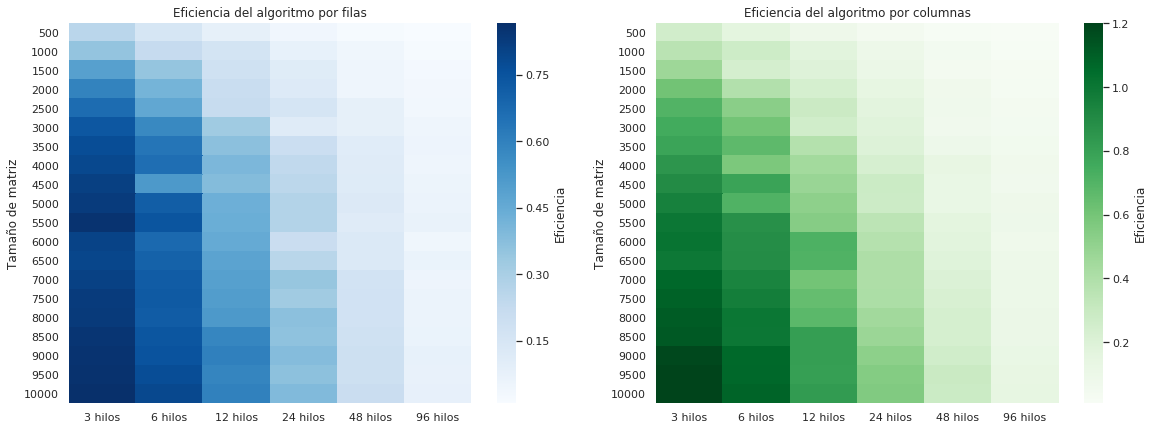

In [263]:
n_threads = pd.Series([1] + [3 * 2**n for n in range(6)], index=new_col_names)

display(n_threads)
efficiency_row = accel_row / n_threads.iloc[1:]
efficiency_col = accel_column / n_threads.iloc[1:]

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)
fig.tight_layout(pad=1.08, h_pad=None, w_pad=4, rect=None)

sns.heatmap(efficiency_row, cmap='Blues', cbar_kws={'label': 'Eficiencia'},
            ax=ax1).set_title("Eficiencia del algoritmo por filas")

sns.heatmap(efficiency_col, cmap='Greens', cbar_kws={'label': 'Eficiencia'},
            ax=ax2).set_title("Eficiencia del algoritmo por columnas")


Secuencial    1.9020
3 hilos       0.7315
6 hilos       0.4030
12 hilos      0.2635
24 hilos      0.2025
48 hilos      0.1895
96 hilos      0.2440
Name: 10000, dtype: float64

10000

Text(0,0.5,'Eficiencia')

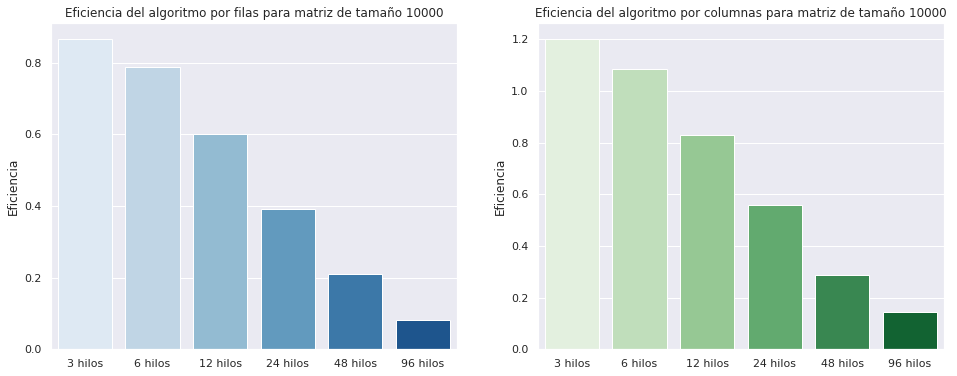

In [268]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)

display(row_data.iloc[-1])

size = row_data.iloc[-1].name
display(size)

row_plt = sns.barplot(x=efficiency_row.iloc[-1].index, y=efficiency_row.iloc[-1],
                      palette="Blues", ax=ax1)
row_plt.set_title('Eficiencia del algoritmo por filas para matriz de tamaño {}'.format(size))
col_plt = sns.barplot(x=efficiency_col.iloc[-1].index, y=efficiency_col.iloc[-1],
                      palette="Greens", ax=ax2)
col_plt.set_title('Eficiencia del algoritmo por columnas para matriz de tamaño {}'.format(size))

# row_plt = row_data.iloc[-1].plot(title='Rendimiento del algoritmo por filas para matriz de tamaño 5000',
#                                 ax=ax1, kind='bar', colormap='plasma')
row_plt.set_ylabel('Eficiencia')
col_plt.set_ylabel('Eficiencia')

7

Text(0.5,1,'Overhead del algoritmo por columnas')

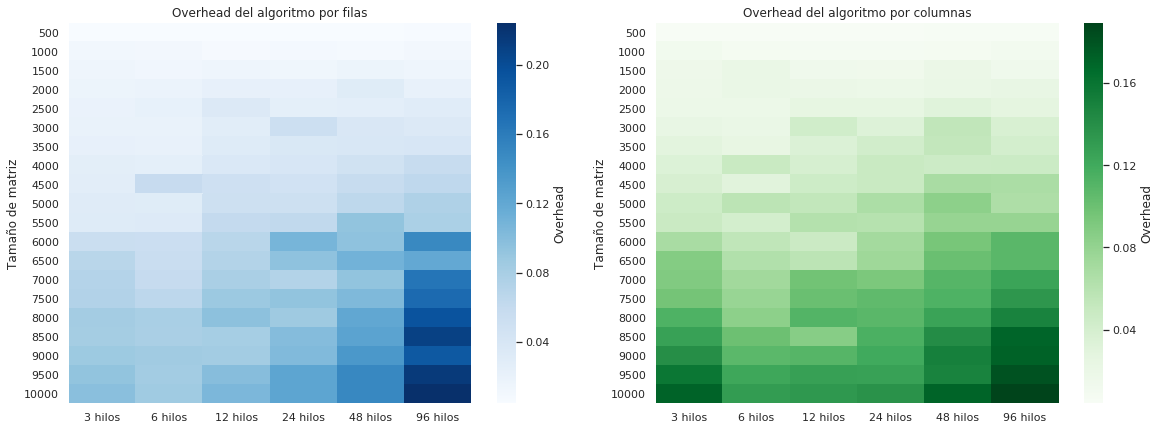

In [265]:
display(len(n_threads))
row_serial_time = pd.concat([row_data.iloc[:, 0]] * (len(n_threads) - 1), axis=1)
col_serial_time = pd.concat([column_data.iloc[:, 0]] * (len(n_threads) - 1), axis=1)

row_serial_time.columns = n_threads.index[1:]
col_serial_time.columns = n_threads.index[1:]

row_overhead = row_data.iloc[:, 1:] - (row_serial_time / n_threads.iloc[1:])
col_overhead = column_data.iloc[:, 1:] -  (row_serial_time / n_threads.iloc[1:])

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16, 6)
fig.tight_layout(pad=1.08, h_pad=None, w_pad=4, rect=None)

sns.heatmap(row_overhead, cmap='Blues', cbar_kws={'label': 'Overhead'},
            ax=ax1).set_title("Overhead del algoritmo por filas")

sns.heatmap(col_overhead, cmap='Greens', cbar_kws={'label': 'Overhead'},
            ax=ax2).set_title("Overhead del algoritmo por columnas")